# Clustering ECG Data

In [1]:
import random
import pickle
from IPython.display import Image
from IPython.display import display
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from biosppy.signals import ecg
from fastdtw import fastdtw
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

In [2]:
plt.rcParams["figure.figsize"]  = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color']     = 'b'
plt.rcParams['axes.grid']       = True 

## Data Preprocessing

In [3]:
f = open('X.pkl', 'rb')
X = pickle.load(f)
f.close()

f = open('y.pkl', 'rb')
y = pickle.load(f)
f.close()

Text(0.5, 1.0, 'Arrhythmia 0')

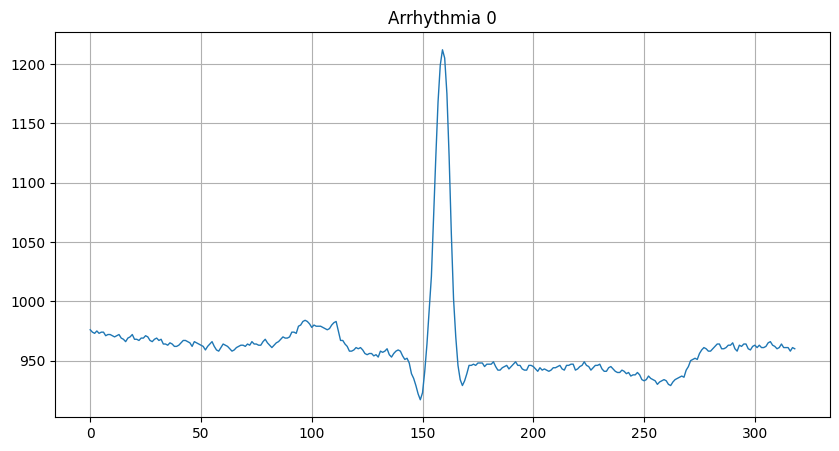

In [4]:
w0 = X[0]
y0 = y[0]

plt.plot(w0)
plt.title('Arrhythmia {}'.format(y0))

### Segmentation

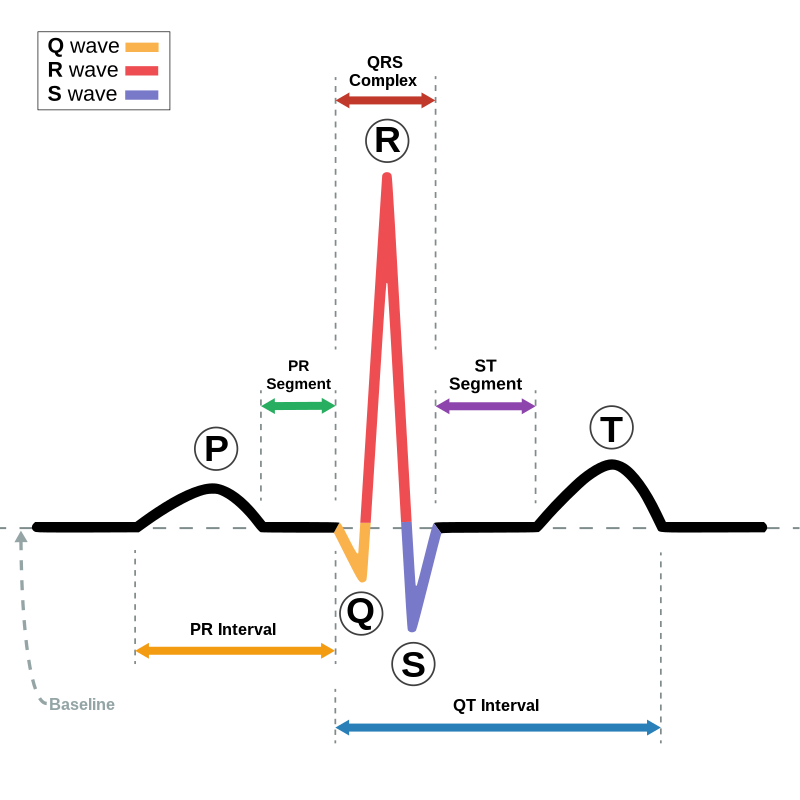

In [5]:
display(Image(filename='SinusRhythmLabels.png', width=600))

### DTW Distance Matrix

In [6]:
def dtwdist(i, j):
    """
    Calculate pairwise distances using DTW
    """
    if D[i, j] == 0:
        d, _ = fastdtw(X[i], X[j])
        D[i, j] = d
        D[j, i] = d

In [7]:
# ri = random.sample(range(len(X)), 100)

# X = [X[i] for i in ri]
# y = [y[i] for i in ri]

In [8]:
# n features of each class
spread = 100

U = []
v = []
n = 0
for i in set(y):
    n += spread
    for j in range(len(y)):
        if i == y[j]:
            U.append(X[j])
            v.append(y[j])
            
        if len(v) == n:
            break

X = U
y = v

In [ ]:
len_X = len(X)

# Compute distance matrix using DTW
D = np.zeros((len_X, len_X))

for i in tqdm(range(len_X)):
    for j in range(len_X):
        dtwdist(i, j)

  3%|███▏                                                                                                       | 18/600 [07:32<4:01:22, 24.88s/it]

In [ ]:
f = open('D.pkl', 'wb')
pickle.dump(D, f)
f.close()

In [ ]:
f = open('D.pkl', 'rb')
D = pickle.load(f)
f.close()

### KMeans

In [ ]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(D) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=11)
    cluster_labels = clusterer.fit_predict(D)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(D, cluster_labels)
    print("For n_clusters=", n_clusters)
    print("The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(D, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        M[:, 0], M[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=11)
kmeans.fit(M)

# Plot each cluster separately with overlapping waves
for cluster in range(n_clusters):
    z = []
    plt.title(f"Cluster {cluster}")
    for i in range(len_X):
        if kmeans.labels_[i] == cluster:
            plt.plot(X[i], label=f"Time Series {i}", alpha=0.5)
            z.append(y[i])  
    plt.show()

    # Proportions
    u, c = np.unique(z, return_counts=True)
    proportions = c / len(z)
    for v, p in zip(u, proportions):
        print(v, p)

### Hierarchial Clustering

In [ ]:
# Convert the distance matrix to a condensed distance matrix
C = pdist(M)

L = linkage(C, method='average')

In [ ]:
dendrogram(L)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()